In [ ]:
## L2的正则路径，可以看到C越小，权重系数越小

d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWar

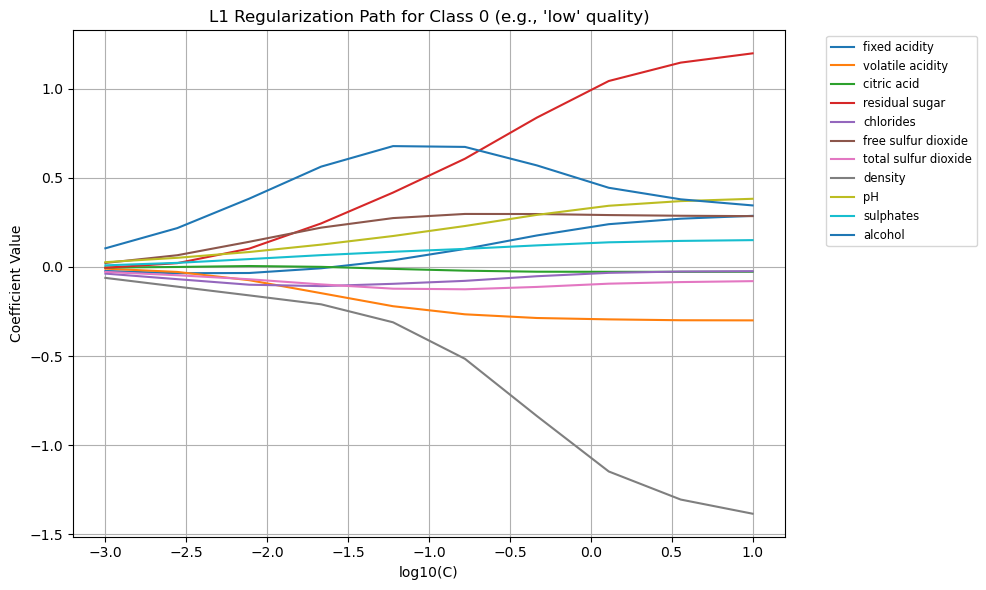

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 读取数据
white_wine = pd.read_csv("d:\data\winequality-white.csv", sep=";")

# 创建标签
def quality_to_label(q):
    if q <= 5:
        return 'low'
    elif q <= 7:
        return 'medium'
    else:
        return 'high'

white_wine['quality_label'] = white_wine['quality'].apply(quality_to_label)

# 特征与标签
X = white_wine.drop(['quality', 'quality_label'], axis=1)
y = white_wine['quality_label']

# 编码标签
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 正则化强度
C_values = np.logspace(-3, 1, 10)
coefs = []

# 记录每个C值下的模型第0类系数
for c in C_values:
    clf = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, C=c)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_[0])  # 仅取第0类（如 'low' 类）对应的系数

# 转为 NumPy 数组
coefs = np.array(coefs)

# 绘图
plt.figure(figsize=(10, 6))
for i, feature in enumerate(X.columns):
    plt.plot(np.log10(C_values), coefs[:, i], label=feature)

plt.xlabel("log10(C)")
plt.ylabel("Coefficient Value")
plt.title("L1 Regularization Path for Class 0 (e.g., 'low' quality)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



In [5]:
C_values

array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# 1. 读取数据
white_wine = pd.read_csv("d:\data\winequality-white.csv", sep=";")

# 2. 创建质量等级标签列
def quality_to_label(q):
    if q <= 5:
        return 'low'
    elif q <= 7:
        return 'medium'
    else:
        return 'high'

white_wine['quality_label'] = white_wine['quality'].apply(quality_to_label)

# 3. 特征与目标变量
X = white_wine.drop(['quality', 'quality_label'], axis=1)
y = white_wine['quality_label']

# 4. 标签编码
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 7. 设置不同的C值进行测试
C_values = [0.01, 0.1, 1.0, 10.0]
results = []

for c in C_values:
    # OvR 模型
    lr_ovr = LogisticRegression(C=c, multi_class='ovr', solver='lbfgs', max_iter=1000)
    lr_ovr.fit(X_train, y_train)
    y_pred_ovr = lr_ovr.predict(X_test)
    acc_ovr = accuracy_score(y_test, y_pred_ovr)

    # Multinomial 模型
    lr_multi = LogisticRegression(C=c, multi_class='multinomial', solver='lbfgs', max_iter=1000)
    lr_multi.fit(X_train, y_train)
    y_pred_multi = lr_multi.predict(X_test)
    acc_multi = accuracy_score(y_test, y_pred_multi)

    # 记录结果
    results.append((c, acc_ovr, acc_multi))

# 8. 显示结果
results_df = pd.DataFrame(results, columns=["C", "OvR Accuracy", "Multinomial Accuracy"])
print(results_df)


d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\nancy\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.

       C  OvR Accuracy  Multinomial Accuracy
0   0.01      0.712245              0.716327
1   0.10      0.716327              0.713265
2   1.00      0.715306              0.712245
3  10.00      0.714286              0.710204
